In [5]:
import numpy as np
import matplotlib.pyplot as plt
import functools as ft

## Basic Functional Programming

In [3]:
# Imperative Python
def sum_100():
    s = 0
    for i in range(1, 101):
        s += i
    return s

In [4]:
sum_100()

5050

In [7]:
# Functional Python
def sum_100_func():
    return ft.reduce(lambda x, y: x + y, range(1,101))

In [8]:
sum_100_func()

5050

### Lambda function

In [9]:
def f(x):
    return x ** 2

In [10]:
f(5)

25

In [11]:
# Differentiation
def diff(f, x, h=1e-6):
    return (f(x+h) - f(x)) / h

In [12]:
diff(f, 2)

4.0000010006480125

In [13]:
diff(lambda x: x**3, 2)

12.000006002210739

In [ ]:
# a = 5 : declare   ; 5 : Literal
# def f(x): declare ; lambda x: blabla : Literal

In [15]:
(lambda x, y: x + y)(2, 3)

5

### Map, Filter, Reduce

In [16]:
x = [1,2,3]

In [29]:
y = np.empty(3) # 메모리의 임의의 영역을 할당함 -> 매우 빠름! 그러나 불러온 값은 예측불가
for i in range(len(x)):
    y[i] = x[i] ** 2
y

array([1., 4., 9.])

In [31]:
def empty_test(n):
    y = np.empty(n)
    return y + 1

In [32]:
def zeros_test(n):
    y = np.zeros(n)
    return y + 1

In [36]:
%timeit empty_test(1000000)

1.94 ms ± 51.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [37]:
%timeit zeros_test(1000000)

1.95 ms ± 28.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [39]:
# Python map
list(map(lambda x: x**2, x))

[1, 4, 9]

In [41]:
# Coconut
(x -> x**2)(3) # Lambda function

9

In [42]:
# Coconut Pipeline
3 |> x -> x**2

9

In [43]:
np.sin(np.sqrt(3))

0.9870266449903538

In [44]:
3 |> np.sqrt |> np.sin # Coconut pipeline "|>" pipeline operator

0.9870266449903538

In [45]:
def f(x,y):
    return x + 2*y

In [47]:
f(1, 2)

5

In [50]:
def g(y):
    return f(1, y)

In [51]:
g(3)

7

In [54]:
f$(1)

functools.partial(<function f at 0x7f7fcddbf940>, 1)

In [58]:
3 |> f$(1)

7

In [59]:
1 |> f$(?, 3)

7

In [64]:
# Coconut map
y = x \
    |> map$(x -> x**3) \
    |> map$(x -> x + 1) \
    |> list

y

[2, 9, 28]

In [65]:
x

[1, 2, 3]

In [66]:
y = []
for t in x:
    if t % 2 == 0:
        y.append(t)
        
y

[2]

In [67]:
# Python filter
list(filter(lambda x: x % 2 == 0, x))

[2]

In [68]:
# Coconut filter
x |> filter$(x -> x%2==0) |> list

[2]

In [72]:
np.arange(1,100) |> filter$(x -> x%2==0) |> list |> np.array

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68,
       70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98])

In [73]:
z = np.arange(1, 100)

In [74]:
# Numpy filter
z[z%2==0]

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68,
       70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98])

### infix function

In [76]:
X = np.random.rand(100, 100)

In [78]:
Y = np.random.rand(100, 100)

In [79]:
np.matmul(X, Y)

array([[26.63104486, 24.40063652, 24.37381142, ..., 26.42587297,
        23.55035436, 24.19915216],
       [21.34591015, 20.78318093, 20.60592142, ..., 22.96520482,
        21.98523939, 20.56646529],
       [21.91166702, 22.09560802, 22.74396032, ..., 26.55629529,
        21.50197084, 22.19740813],
       ...,
       [22.42870844, 22.23980863, 24.6428381 , ..., 23.67287539,
        19.23134123, 21.97464304],
       [26.99478624, 26.63878525, 25.1643738 , ..., 29.4186416 ,
        24.86646738, 25.19533244],
       [26.12479452, 23.63429582, 23.47742419, ..., 26.62787967,
        22.09000584, 23.78884002]])

In [80]:
np.matmul(np.matmul(X, Y), Y)

array([[1237.68703219, 1246.84129069, 1240.82284064, ..., 1368.48583195,
        1125.18081981, 1223.88616225],
       [1104.13786802, 1110.89056537, 1101.85248239, ..., 1213.56528131,
        1003.06840782, 1088.0911888 ],
       [1122.2895866 , 1132.03913801, 1122.68718546, ..., 1237.55073436,
        1018.08974565, 1110.6637832 ],
       ...,
       [1119.06864819, 1127.14572735, 1117.5763358 , ..., 1230.76166657,
        1017.42295927, 1100.62956293],
       [1293.98074004, 1306.55655707, 1299.76022414, ..., 1428.3819611 ,
        1177.23161934, 1279.12189244],
       [1208.45892758, 1222.31111165, 1212.00988181, ..., 1335.2516289 ,
        1099.16089244, 1195.14938445]])

In [81]:
X `np.matmul` Y `np.matmul` Y

array([[1237.68703219, 1246.84129069, 1240.82284064, ..., 1368.48583195,
        1125.18081981, 1223.88616225],
       [1104.13786802, 1110.89056537, 1101.85248239, ..., 1213.56528131,
        1003.06840782, 1088.0911888 ],
       [1122.2895866 , 1132.03913801, 1122.68718546, ..., 1237.55073436,
        1018.08974565, 1110.6637832 ],
       ...,
       [1119.06864819, 1127.14572735, 1117.5763358 , ..., 1230.76166657,
        1017.42295927, 1100.62956293],
       [1293.98074004, 1306.55655707, 1299.76022414, ..., 1428.3819611 ,
        1177.23161934, 1279.12189244],
       [1208.45892758, 1222.31111165, 1212.00988181, ..., 1335.2516289 ,
        1099.16089244, 1195.14938445]])

In [82]:
def f(x,y):
    return x + 2 * y

In [83]:
f(1,2) # prefix function

5

In [84]:
1 `f` 2 # infix function

5

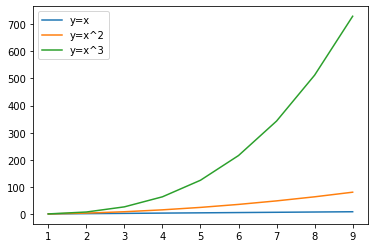

In [94]:
# Plot
# [x, x], [x, x^2], [x, x^3]
x = np.arange(1, 10)
plt.plot(x, x, label="y=x")
plt.plot(x, x**2, label="y=x^2")
plt.plot(x, x**3, label="y=x^3")
plt.legend()
plt.show()

deque([])

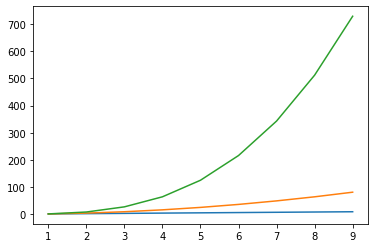

In [90]:
x = np.arange(1, 10)
X = [x, x**2, x**3]
labels = [1, 2, 3]

X |> map$(y -> plt.plot(x, y)) |> consume

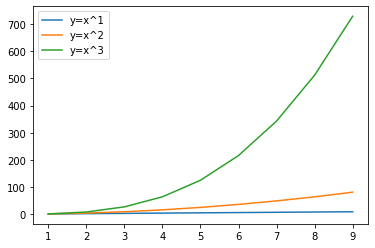

In [93]:
zip(X, labels) \
    |> map$(t -> plt.plot(x, t[0], label="y=x^"+str(t[1]))) \
    |> consume

plt.legend()
plt.show()

In [95]:
x = [1,2,3]
y = [4,5,6]

zip(x, y) |> map$(t -> print(t[0], t[1])) |> consume

1 4
2 5
3 6


deque([])

## Additional Feature

In [119]:
# 피보나치
def fib_py(n):
    if n == 0 or n == 1:
        return 1
    elif isinstance(n, int):
        return fib_py(n-1) + fib_py(n-2)
    else:
        raise TypeError("Fibonacci should require integer")

In [120]:
fib_py(10)

89

In [155]:
# 코코넛 피보나치
def fib(0) = 1
addpattern def fib(1) = 1

@memoize
addpattern def fib(n is int if n > 0) = fib(n-1) + fib(n-2)

In [156]:
fib(10)

89

In [157]:
fib(0)

1

In [158]:
fib(1)

1

In [159]:
fib(100)

573147844013817084101

In [ ]:
# fib(30) = fib(29) + fib(28)
#         = fib(28) + fib(27) + fib(27) + fib(26)
#         = ...

In [164]:
from functools import cache, lru_cache

In [165]:
@lru_cache
def fib_py_cache(n):
    if n == 0 or n == 1:
        return 1
    else:
        return fib_py_cache(n-1) + fib_py_cache(n-2)

In [166]:
fib_py_cache(100)

573147844013817084101